This task involves analyzing sentiment from social media data. You'll explore techniques to extract, process, and analyze textual data from platforms like Twitter, Facebook, or Instagram. Your objective will be to classify user sentiments as positive, negative, or neutral, providing valuable insights for brand reputation management and market research.

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("/kaggle/input/social-media-sentiment-dataset/sentimentdataset.csv")

In [40]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


**Data Preprocessing**

In [41]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)                # Remove URLs
    text = re.sub(r'@\w+', '', text)                   # Remove mentions
    text = re.sub(r'#\w+', '', text)                   # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)                # Remove punctuation
    text = text.lower()                                # Convert to lowercase
    return text

In [42]:
df['cleaned_text'] = df['Text'].apply(clean_text)

In [43]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying a beautiful day at the park ...
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic was terrible this morning ...
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,just finished an amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited about the upcoming weekend getaway ...
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying out a new recipe for dinner tonight ...


In [44]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['tokens'] = df['cleaned_text'].apply(lambda x: [word
                                                   for word in word_tokenize(x)
                                                   if word not in stop_words])

In [46]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text,tokens
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying a beautiful day at the park ...,"[enjoying, beautiful, day, park]"
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic was terrible this morning ...,"[traffic, terrible, morning]"
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,just finished an amazing workout,"[finished, amazing, workout]"
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited about the upcoming weekend getaway ...,"[excited, upcoming, weekend, getaway]"
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying out a new recipe for dinner tonight ...,"[trying, new, recipe, dinner, tonight]"


In [47]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['lemmas'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word)
                                             for word in x])

In [48]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text,tokens,lemmas
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying a beautiful day at the park ...,"[enjoying, beautiful, day, park]","[enjoying, beautiful, day, park]"
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic was terrible this morning ...,"[traffic, terrible, morning]","[traffic, terrible, morning]"
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,just finished an amazing workout,"[finished, amazing, workout]","[finished, amazing, workout]"
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited about the upcoming weekend getaway ...,"[excited, upcoming, weekend, getaway]","[excited, upcoming, weekend, getaway]"
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying out a new recipe for dinner tonight ...,"[trying, new, recipe, dinner, tonight]","[trying, new, recipe, dinner, tonight]"


In [49]:
print(df[['Text', 'cleaned_text', 'lemmas']].head())

                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                                        cleaned_text  \
0   enjoying a beautiful day at the park         ...   
1   traffic was terrible this morning            ...   
2   just finished an amazing workout                   
3   excited about the upcoming weekend getaway   ...   
4   trying out a new recipe for dinner tonight   ...   

                                   lemmas  
0        [enjoying, beautiful, day, park]  
1            [traffic, terrible, morning]  
2            [finished, amazing, workout]  
3   [excited, upcoming, weekend, getaway]  
4  [trying, new, recipe, dinner, tonight]  


**Feature Extraction**

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['cleaned_text'])

In [72]:
print(X[0])

  (0, 1501)	0.5210383702739757
  (0, 2117)	0.11498260986232302
  (0, 119)	0.3091509068039187
  (0, 520)	0.3608437592416269
  (0, 171)	0.5023184966310896
  (0, 686)	0.48702324617255777


In [79]:
unique_sentiments = df['Sentiment'].unique()
print(unique_sentiments)

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

In [81]:
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

In [83]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [85]:
def map_sentiment(text):
    score = sia.polarity_scores(text)['compound']

    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [89]:
df['General_Sentiment'] = df['Sentiment'].apply(map_sentiment)

In [93]:
df['General_Sentiment'].head()

,General_Sentiment
0,positive
1,negative
2,positive
3,positive
4,neutral


In [90]:
y = df['General_Sentiment'].apply(lambda x: 1 if x == 'positive'
                                  else -1 if x == 'negative'
                                  else 0)

In [92]:
y.head()

,General_Sentiment
0,1
1,-1
2,1
3,1
4,0


In [94]:
y.unique()

array([ 1, -1,  0])

**Model Training**

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [96]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [97]:
y_pred = model.predict(X_test)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  0,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1])

In [98]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5170068027210885
              precision    recall  f1-score   support

          -1       0.82      0.21      0.34        42
           0       1.00      0.05      0.10        40
           1       0.49      1.00      0.65        65

    accuracy                           0.52       147
   macro avg       0.77      0.42      0.36       147
weighted avg       0.72      0.52      0.41       147



**Visualization**

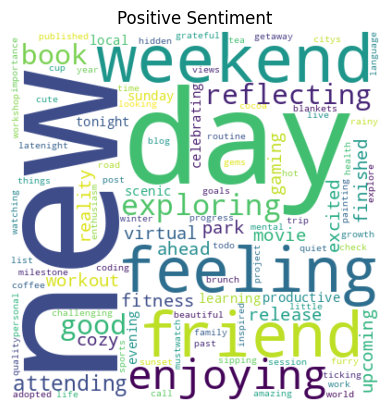

In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a word cloud for positive sentiment
positive_text = " ".join(df[df['Sentiment'] == 'positive']['cleaned_text'])
positive_wc = WordCloud(width=400, height=400, max_words=100,
                        background_color='white').generate(positive_text)

# Display the word cloud
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment')
plt.show()